# Pre-procesado de Datos

Proceso de covertir o mapear datos desde su forma bruta a otro formato, con el fin de preparar los datos para un futuro análisis.
* Manejar e identificar valores faltantes (Nulos)
* Formateo de datos.
* Normalización (Centrado/Escalado).
* **Data Binning:** Agrupación de datos en intervalos (**Bins**).
* Convertir datos categóricos a numéricos.

## 1. Tratando Valores Faltantes con Python
* Ocurre cuando no hay valores guardados para una variable (Característica) en una observación.
* Pueden estar representados como "?", "N/A", "NaN", "Null", 0 o como una celda en blanco.

**¿Que hacer con los datos faltantes?**
* Verificar con la fuente de datos.
* Eliminar los valores que faltan:
    
    * Elimimar la varible (columna).
    * Eliminar el registro (fila). Mejor opción.
* Reemplazar los datos faltantes: Aún mejor opción, porque no hay desperdicio de datos. Es menos preciso.
    * Con el promedio (De puntos de datos similares).
    * Por frequencia.
    * En base a otras funciones.
* Dejar los valores faltantes.

### 1.1. Eliminando Valores Faltantes
Usando .dropna() de la librería pandas.

Sea el DataFrame:

In [184]:
import pandas as pd
import numpy as np

table={'highway-mpg':[20,22,29],'price':[23875,np.nan,16430]}
df=pd.DataFrame(table)
df

,highway-mpg,price
0,20,23875.0
1,22,NaN
2,29,16430.0


Por defecto elimina el registro con el valor "NaN":

In [186]:
clean_df=df.dropna()
clean_df

,highway-mpg,price
0,20,23875.0
2,29,16430.0


De igual manera se puede usar axis=0 para eliminar el registro:

**Para ejecutar la limpieza de datos directo en el DataFrame se usa el argumento inplace=True**

In [188]:
df.dropna(subset='price',axis=0,inplace=True)
df

,highway-mpg,price
0,20,23875.0
2,29,16430.0


Tambien se puede eliminar la variable usando axis=1:

In [190]:
#Se reinicia el DataFrame a sus estado original.
df=pd.DataFrame(table)
#Se ejecuta la limpieza.
df.dropna(axis=1,inplace=True)
df

,highway-mpg
0,20
1,22
2,29


## 1.2. Reemplazando Valores Faltantes
Usando .replace(valor_faltante,nuevo_valor) de pandas. El valor faltante es reemplazado por el promedio de las entradas en esa columna.

Sea el DataFrame:

In [192]:
table={'normalized-losses':[164,164,np.nan,158],'make':['audi','audi','audi','audi']}
df=pd.DataFrame(table)
df

,normalized-losses,make
0,164.0,audi
1,164.0,audi
2,NaN,audi
3,158.0,audi


Primero se calcula el promedio de la columna con la función incluida en Python .mean():

In [194]:
mean=df['normalized-losses'].mean()

Luego se usa este valor para reemplazar los faltantes con la función .replace():

In [196]:
df['normalized-losses'].replace(np.nan,mean)
df

,normalized-losses,make
0,164.0,audi
1,164.0,audi
2,NaN,audi
3,158.0,audi


# 2. Formateo de Datos
Los datos se pueden guardar en distintos formatos, ya que estos por general son recolectados de distintas fuentes o por distintas personas. Formatear los datos a un estándar común de expresiones permite hacer comparaciones más significativas. El objetivo es hacer los datos más consistente y fácil de entender.

## 2.1. Conversión de Unidades
En Estados Unidos el consumo de un vehículo de combustión interna se mide en "mpg" (miles per gallon), mientras que en otros países que utilizan el sistema de unidades métrico se mide en "L/100km" (litros cada 100km).

Sea el DataFrame para el consumo de combustible de ciudad en unidades "mpg":

In [199]:
table={'city-mpg':[21,21,19,18,20,17]}
df=pd.DataFrame(table)
df

,city-mpg
0,21
1,21
2,19
3,18
4,20
5,17


Ahora, con la finalidad de presentar los datos para un usuario de algún país en el que se use el sistema métrico, se convierte el consumo de combustible de "mpg" a "L/100km" realizando el siguiente cálculo a toda la columna:

In [201]:
#Cálculo para convertir unidades, el resultado se redonde a dos decimales
df['city-mpg']=round(235/df['city-mpg'],2)
#Cambio de encabezado de columna a la unidad correspondiente
df.rename(columns={'city-mpg':'city-L/100km'},inplace=True)
df

,city-L/100km
0,11.19
1,11.19
2,12.37
3,13.06
4,11.75
5,13.82


## 2.2. Tipo de Datos Incorrecto
A veces se asigna un tipo de datos incorrecto a alguna variable.

Ejemplo, sea el siguiente DataFrame con precios de productos:

In [203]:
prices={'product':['a','b','c','d','e'],'price':['19859','20821','32864','21073','25701']}
df_prices=pd.DataFrame(prices) 
df_prices

,product,price
0,a,19859
1,b,20821
2,c,32864
3,d,21073
4,e,25701


Para ver que tipos de datos se tiene en el data frame se usa .dtypes:

In [205]:
df_prices.dtypes

product    object
price      object
dtype: object

Recordar que un dato tipo object de pandas es equivalente a un string de Python, el tipo de dato correcto para el precio (price) sería un entero (int en Python/int16, int32 o int64 para pandas), por lo que se usa .astype() para modificar el tipo de dato:

In [207]:
df_prices['price']=df_prices['price'].astype(int)
df_prices.dtypes

product    object
price       int32
dtype: object

# 3. Normalización
Con la finalidad de que los datos tengan la misma influencia en modelos. Por ejemplo, en modelos predicción se suele normalizar para que todas las variables tengan la misma influencia. En el siguiente ejemplo las edades e ingresos se encuentran en distintos rangos, tras la normalización se encuentran dentro del mismo rango entre 0 y 1.

In [209]:
data={'age':[18,30,50,29,20],'income':[20000,10000,50000,30000,60000]}
df=pd.DataFrame(data)
df

,age,income
0,18,20000
1,30,10000
2,50,50000
3,29,30000
4,20,60000


Las edades se manejan en un rango de [0-100], mientras que los ingresos en un rango de [0-60000], rangos bastante diferentes, naturalmente el ingreso tendrá mayor influencia en un modelo de regresión lineal, por ejemplo. Con la siguiente normalización las dos variables están dentro del rango de [0-1].

In [211]:
df['age']=df['age']/100
df['income']=df['income']/60000
df

,age,income
0,0.18,0.333333
1,0.30,0.166667
2,0.50,0.833333
3,0.29,0.500000
4,0.20,1.000000


Se obtienen valores dentro del mismo rango o similares, lo que conlleva a una influencia similar en modelo analíticos.

## 3.1. Métodos de Normalización
Existen varios métodos, a continuación, se abordan tres de ellos.

**a) Escalado simple**

Para el escalado simple se utiliza la siguiente ecuación:

$x_{new}=\frac{x_{old}}{x_{max}}$

**Donde:**
* $x_{new}:$ Nuevo valor normalizado.
* $x_{old}:$ Valor original.
* $x_{max}:$ Valor máximo de la columna.

Consiste en dividir cada valor por el valor máximo para esa columna, obteniendo valores dentro del rango [0-1], como en el ejemplo anterior.

**b) Min-Max**

Para el método de Min-Max se utiliza la sigueinte ecuación:

$x_{new}=\frac{x_{old}-x_{min}}{x_{max}-x_{min}}$

**Donde:**
* $x_{new}:$ Nuevo valor normalizado.
* $x_{old}:$ Valor original.
* $x_{max}:$ Valor máximo de la columna.
* $x_{min}:$ Valor mínimo.

Es la razón entre la diferencia entre el valor original y el valor mínimo, y la diferencia entre el valor máximo y el valor mínimo.

**c) Z-score (distribución normal estándar)**

La siguiente ecuación describe el procedimiento para utilizar este método:

$x_{new}=\frac{x_{old}-\mu}{\sigma}$

**Donde:**
* $x_{new}:$ Nuevo valor normalizado.
* $x_{old}:$ Valor original.
* $\mu:$ Promedio de la columna.
* $\sigma:$ Desviación estándar de la columna.

Típicamente se obtienen valores entre -3 y 3.

# 3.2. Métodos de Normalización con Pandas
Sea el siguiente DataFrame que contiene altura, ancho y largo de distintas cajas:

In [213]:
data={'height':[60.0,57.9,64.7,59.9],'width':[30.0,28.9,33.7,29.9],'length':[168.9,170.5,153.2,168.8]}
df=pd.DataFrame(data)
df

,height,width,length
0,60.0,30.0,168.9
1,57.9,28.9,170.5
2,64.7,33.7,153.2
3,59.9,29.9,168.8


Aplicando normalización **escalar simple** para cada característica:

In [215]:
df['height']=round((df['height']/df['height'].max()),4)
df['width']=round((df['width']/df['width'].max()),4)
df['length']=round((df['length']/df['length'].max()),4)
df

,height,width,length
0,0.9274,0.8902,0.9906
1,0.8949,0.8576,1.0000
2,1.0000,1.0000,0.8985
3,0.9258,0.8872,0.9900


Aplicando normalización **Min-Max** para cada característica :

In [217]:
#Se reinicia el DataFrame a sus valores originales
df=pd.DataFrame(data)
#Normalización
df['height']=round(((df['height']-df['height'].min())/(df['height'].max()-df['height'].min())),4)
df['width']=round(((df['width']-df['width'].min())/(df['width'].max()-df['width'].min())),4)
df['length']=round(((df['length']-df['length'].min())/(df['length'].max()-df['length'].min())),4)
df

,height,width,length
0,0.3088,0.2292,0.9075
1,0.0000,0.0000,1.0000
2,1.0000,1.0000,0.0000
3,0.2941,0.2083,0.9017


Aplicando normalización **Z-score** para cada característica:

In [219]:
#Se reinicia el DataFrame a sus valores originales
df=pd.DataFrame(data)
#Normalización
df['height']=round((df['height']-df['height'].mean())/df['height'].std(),4)
df['width']=round((df['width']-df['width'].mean())/df['width'].std(),4)
df['length']=round((df['length']-df['length'].mean())/df['length'].std(),4)
df

,height,width,length
0,-0.2167,-0.2963,0.4363
1,-0.9450,-0.8178,0.6329
2,1.4131,1.4578,-1.4931
3,-0.2514,-0.3437,0.4240


# 4. Binning en Python

Método de pre-procesamiento de datos, consiste en agrupar valores en 'bins'. Por ejemplo, se puede categorizar precios en alto, medio y alto.

Sea la siguiente lista de precios:

In [222]:
prices={'price':[14921,15224,16312,18449,15980,12902,19241,11321,16000,16990,15990,19801,11271,19872,19873,18709,19990,18092,18703]}
df_price=pd.DataFrame(prices)
sort_price=df_price.sort_values(by=['price'], ascending=False)
sort_price.head()

,price
16,19990
14,19873
13,19872
11,19801
6,19241


Se puede hacer Binning con el siguiente código:

In [224]:
bins=np.linspace(min(sort_price['price']),max(sort_price['price']),4) #Se obtienen 4 números divisores que tienen la misma distancia entre cada uno.
group_names=['Low','Medium','High']
sort_price['price-binned']=pd.cut(sort_price['price'],bins,labels=group_names,include_lowest=True) #Cut para segmentar los valores en bins.
sort_price.head(10)

,price,price-binned
16,19990,High
14,19873,High
13,19872,High
11,19801,High
6,19241,High
15,18709,High
18,18703,High
3,18449,High
17,18092,High
9,16990,Medium


Para visualizar datos en bins se usan histogramas.

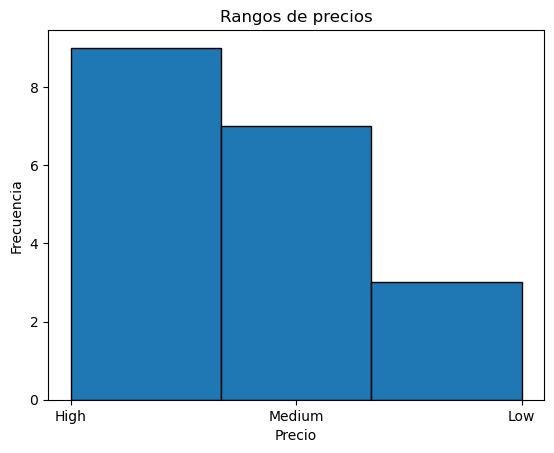

In [226]:
import matplotlib.pyplot as plt

sort_price['price-binned'].hist(bins=3,edgecolor='black')
plt.title('Rangos de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

# 5. Convirtiendo Variables Categorias a Cuantitativas

La mayoría de los modelos estadísticos no pueden tomar objetos (cadenas de texto) como input. Para transformar variables categorías a variables cuantitativas ficticias, se puede usar el método pd.get_dummies(), convirtiendo las variables categóricas en variables ficticias o dummy (0 o 1).

Sea el siguiente dataframe que categoriza dos estados de los equipos, falla y no falla:

In [230]:
main={'Equipo':['A','C','D','B','N','K'],'Estado':['falla','no falla','no falla','falla','no falla','no falla']}
df_main=pd.DataFrame(main)
df_main

,Equipo,Estado
0,A,falla
1,C,no falla
2,D,no falla
3,B,falla
4,N,no falla
5,K,no falla


Se obtienen la variables categóricas (0 o 1) de la siguiente manera:

In [232]:
pd.get_dummies(df_main['Estado']).astype(int)

,falla,no falla
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1


# 7. Conlusiones

El preprocesamiento de datos es esencial para limpiar y transformar datos en bruto, asegurando que sean consistentes y adecuados para análisis o modelado. Esto incluye manejar valores faltantes, normalizar datos, y convertir variables categóricas en numéricas, lo que mejora la precisión y eficiencia de los algoritmos de machine learning o análisis estadístico.

# Autor
Benjamín San Martín Peña, Ingeniero Civil Industrial.